# Kaggle
## Competição DSA de Machine Learning - Dezembro 2019

## EDA Notebook

#### Upvote se esse notebook for util

In [4]:
# Carregando os pacotes
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

%matplotlib inline

# Statistic lib
from scipy import stats
from scipy.stats import skew, norm

# Sklearn lib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Utils
import re 
import math, string, os
import datetime

# Options
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 2000
pd.set_option('display.max_columns', None)
import gc
gc.enable()

# Variavel para controlar o treinamento no Kaggle
TRAIN_OFFLINE = True

In [5]:
def read_data():
    
    if TRAIN_OFFLINE:
        print('Carregando arquivo dataset_treino.csv....')
        train = pd.read_csv('../dataset/dataset_treino.csv')
        print('dataset_treino.csv tem {} linhas and {} colunas'.format(train.shape[0], train.shape[1]))
        
        print('Carregando arquivo dataset_teste.csv....')
        test = pd.read_csv('../dataset/dataset_teste.csv')
        print('dataset_teste.csv tem {} linhas and {} colunas'.format(test.shape[0], test.shape[1]))
    else:
        print('Carregando arquivo dataset_treino.csv....')
        train = pd.read_csv('/kaggle/input/competicao-dsa-machine-learning-dec-2019/dataset_treino.csv')
        print('dataset_treino.csv tem {} linhas and {} colunas'.format(train.shape[0], train.shape[1]))
        
        print('Carregando arquivo dataset_treino.csv....')
        test = pd.read_csv('/kaggle/input/competicao-dsa-machine-learning-dec-2019/dataset_teste.csv')
        print('dataset_teste.csv tem {} linhas and {} colunas'.format(test.shape[0], test.shape[1]))
    
    return train, test

In [6]:
# Leitura dos dados
train, test = read_data()

Carregando arquivo dataset_treino.csv....
dataset_treino.csv tem 114321 linhas and 133 colunas
Carregando arquivo dataset_teste.csv....
dataset_teste.csv tem 114393 linhas and 132 colunas


# 1. ANALISE GERAL

In [ ]:
profile = pandas_profiling.ProfileReport(train, check_recoded = True)
rejected_variables = profile.get_rejected_variables(threshold=0.9)

In [11]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB
None


In [20]:
# Visualizando os tipos das features
train.dtypes

ID          int64
target      int64
v1        float64
v2        float64
v3         object
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22        object
v23       float64
v24        object
v25       float64
v26       float64
v27       float64
v28       float64
v29       float64
v30        object
v31        object
v32       float64
v33       float64
v34       float64
v35       float64
v36       float64
v37       float64
v38         int64
v39       float64
v40       float64
v41       float64
v42       float64
v43       float64
v44       float64
v45       float64
v46       float64
v47        object
v48       float64
v49       float64
v50       float64
v51       float64
v52        object
v53       float64
v54       

In [17]:
# Visualizando os primeiros registros do dataset
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

In [12]:
train.describe(include=['object', 'bool'])

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
count,110864,113821,114321,54211,110864,114321,114318,107439,114321,114321,114321,114321,114321,114318,114318,114321,113939,59017,114244
unique,3,18210,5,7,3,10,12,122,3,9,3,4,18,7,7,3,22,36,90
top,C,AGDF,E,C,A,C,J,BW,A,F,B,D,C,A,E,A,F,G,BM
freq,110584,2386,55177,32178,88347,55425,11103,11351,70353,75094,113560,75087,34561,27079,27079,55688,21671,16252,5759


In [14]:
train[train['target'] == 1].mean()

ID        114225.975489
target         1.000000
v1             1.625671
v2             7.526222
v4             4.184315
v5             8.768369
v6             2.446883
v7             2.495146
v8             1.478357
v9             9.018015
v10            1.999184
v11           15.452727
v12            6.909647
v13            3.781449
v14           12.199962
v15            2.067343
v16            4.913315
v17            3.884222
v18            0.842440
v19            0.221235
v20           17.792365
v21            7.070429
v23            1.018368
v25            1.684468
v26            1.885469
v27            2.757167
v28            5.073490
v29            8.223457
v32            1.611770
v33            2.135658
v34            6.515044
v35            8.120198
v36           13.320531
v37            0.734845
v38            0.111146
v39            1.267632
v40           10.410736
v41            7.188400
v42           12.924366
v43            2.227273
v44           10.851329
v45            9

In [15]:
train[train['target'] == 0].mean().T

ID        114238.340330
target         0.000000
v1             1.646081
v2             7.274653
v4             4.024702
v5             8.662844
v6             2.404222
v7             2.449455
v8             1.552248
v9             9.074359
v10            1.513185
v11           15.431097
v12            6.791044
v13            3.850430
v14           11.757420
v15            2.122566
v16            4.953639
v17            3.672782
v18            0.836764
v19            0.225571
v20           17.715960
v21            6.900479
v23            1.322128
v25            1.739897
v26            1.847052
v27            2.701353
v28            5.154235
v29            8.154097
v32            1.654021
v33            2.241382
v34            6.059693
v35            8.129107
v36           13.543942
v37            0.761814
v38            0.026484
v39            1.143700
v40           10.641711
v41            7.164595
v42           12.926804
v43            2.183818
v44           10.622761
v45            9

In [24]:
train[train['v24'].apply(lambda x: x[0] == 'C')].head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.64982,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,3.575369e-02,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,5.988956e-01,AF,NaN,NaN,1.957825,0,NaN,NaN
9,23,1,1.144802,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,9.977529,2.363238,16.091401,7.417853,4.176949,13.790046,2.319558,5.900000,2.768652,0.812777,0.271822,18.410067,8.312447,PYF,3.955979e-08,C,0.509588,1.168523,1.410891,6.908275,9.059405,C,A,2.060643,2.475247,6.498729,9.603961,14.658608,0.793651,0,0.075258,10.803126,8.279704,13.267328,1.238725,10.295850,12.480398,0.343973,I,13.982603,8.954208,0.993324,6.682327,A,16.489072,0.232800,1.707922,NaN,3.811880,6.417392,13.204338,1.055074,13.528267,3,0.390694,4.874554,16.499231,A,10.290842,19.495653,9.200000,15.052754,F,3,2.781119,B,D,1.668671,8.644803,13.099999,C,2.651686,7.017475,3.679445,2.43193,2.190594,2.747749,1.512996,12.324700,0.878712,0.171153,1.189657,A,1.022954,5.432639,3.152513,1.158783,7.469059,7.380952,5.772735,1.179868,13.582609,7.197289,3.694347,4.389466,3.001609,0.278599,10.064205,E,2.240590,3.837530,A,3.972772,J,P,13.434123,10.700001,1.270491,10.719493,8.174604,8.931283e+00,0.434782,2.715964,7.325843,4.896617,8.943653e-03,E,1.344550,1.601176,1.928009,0,3.174603,1.000000
13,30,1,1.400267,5.367204,C,4.122155,8.137188,2.983080,2.640249,0.211851,11.021506,1.816193,15.594521,6.215176,2.861102,11.185820,2.078265,4.530388,3.085747,1.871510,0.176272,17.735728,5.830767,MVD,-8.939182e-07,C,0.059349,1.608044,3.833482,9.602310,7.319680,NaN,B,1.369102,1.611755,5.090793,6.892254,12.587746,0.573355,0,1.601502,12.478836,6.335707,11.393588,2.158904,11.958010,6.940802,0.122972,C,12.972181,7.097062,3.219132,6.380539,J,15.815085,0.051092,1.148709,AL,3.878006,5.672205,7.837297,1.469278,14.642433,0,0.109179,5.416024,16.107041,A,8.125556,16.117825,9.502763,8.806745,F,4,2.340183,B,D,1.869747,6.522706,13.591161,B,2.204302,6.305777,14.600117,1.64292,1.095281,1.592115,1

In [ ]:
sns.distplot(train['target']);
#skewness and kurtosis
print("Skewness: %f" % train['target'].skew())
print("Kurtosis: %f" % train['target']kurt())

In [28]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  114
Number of Categorical features:  19


In [29]:
print(train[numerical_feats].columns)
print("*"*100)
print(train[categorical_feats].columns)

Index(['ID', 'target', 'v1', 'v2', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v23', 'v25', 'v26', 'v27', 'v28', 'v29', 'v32', 'v33', 'v34',
       'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44',
       'v45', 'v46', 'v48', 'v49', 'v50', 'v51', 'v53', 'v54', 'v55', 'v57',
       'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v67', 'v68',
       'v69', 'v70', 'v72', 'v73', 'v76', 'v77', 'v78', 'v80', 'v81', 'v82',
       'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v92', 'v93',
       'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100', 'v101', 'v102',
       'v103', 'v104', 'v105', 'v106', 'v108', 'v109', 'v111', 'v114', 'v115',
       'v116', 'v117', 'v118', 'v119', 'v120', 'v121', 'v122', 'v123', 'v124',
       'v126', 'v127', 'v128', 'v129', 'v130', 'v131'],
      dtype='object')
**************************************************************************

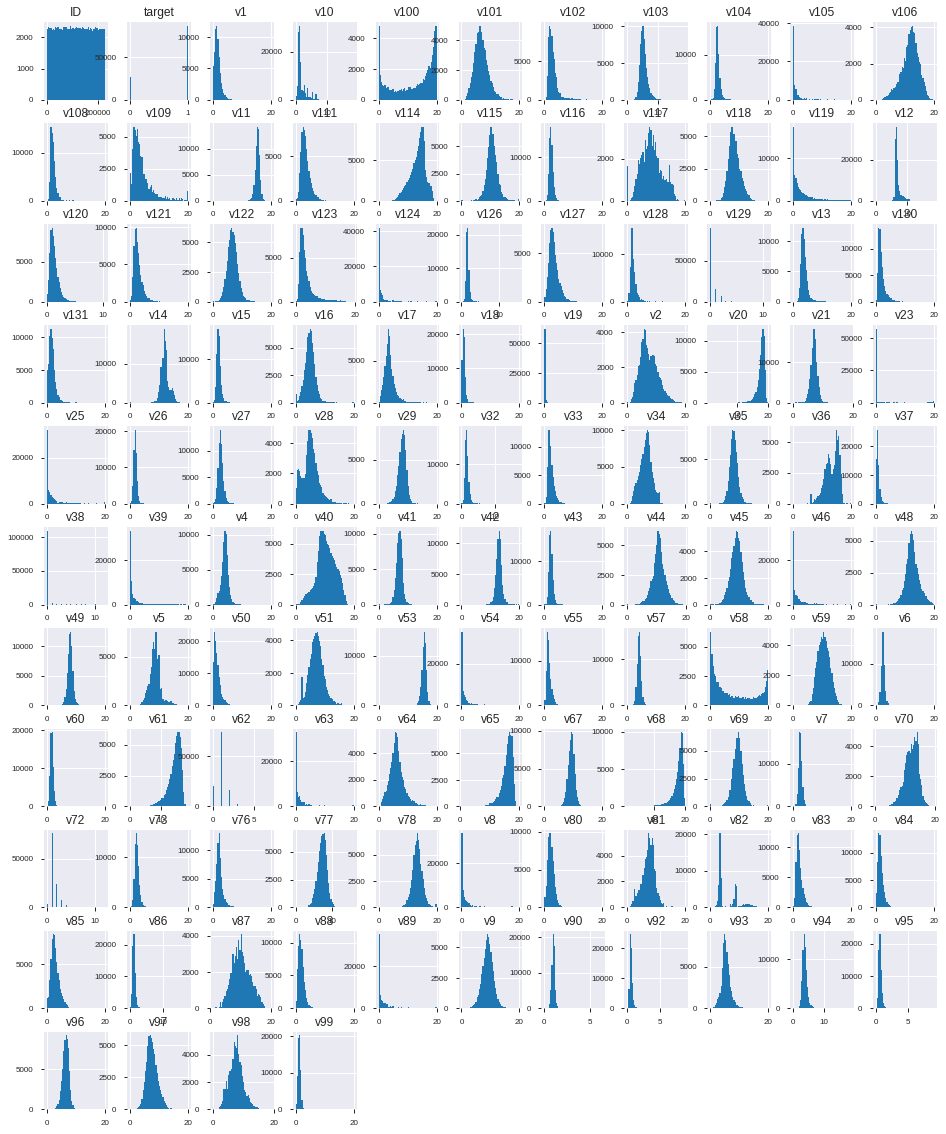

In [31]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

Preview of data:


,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB
None

Preview of data with null values:


,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472


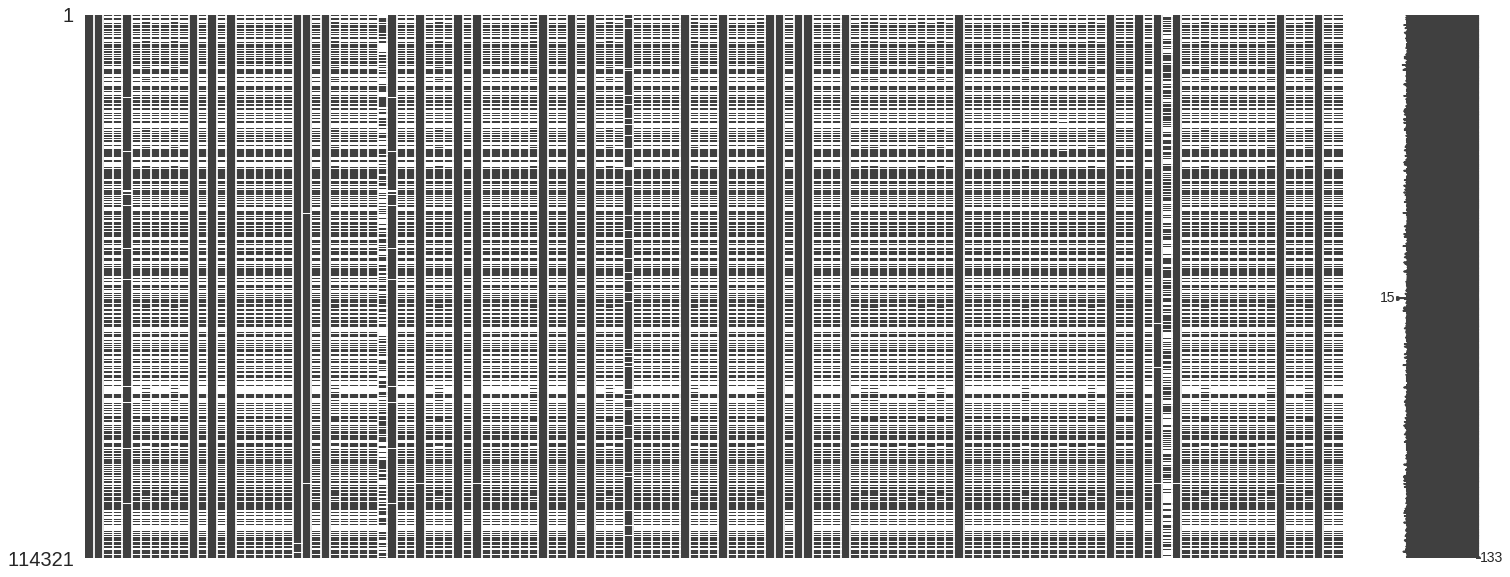


No duplicated entries found

To check: 
Unique count of non-numeric data

v3          3
v22     18210
v24         5
v30         7
v31         3
v47        10
v52        12
v56       122
v66         3
v71         9
v74         3
v75         4
v79        18
v91         7
v107        7
v110        3
v112       22
v113       36
v125       90
dtype: int64
Top 5 unique values of v3
  v3   Count
0  C  110584
1  A     227
2  B      53
 
Top 5 unique values of v22
    v22  Count
0  AGDF   2386
1   YGJ   2119
2   QKI    668
3   PWR    649
4   HZE    423
 
Top 5 unique values of v24
  v24  Count
0   E  55177
1   D  26333
2   C  20872
3   B   8150
4   A   3789
 
Top 5 unique values of v30
  v30  Count
0   C  32178
1   G   8728
2   D   5225
3   E   2973
4   F   2589
 
Top 5 unique values of v31
  v31  Count
0   A  88347
1   B  18947
2   C   3570
 
Top 5 unique values of v47
  v47  Count
0   C  55425
1   I  39071
2   E   5301
3   F   4322
4   G   3946
 
Top 5 unique values of v52
  v52  Count
0   J

,count,mean,std,min,25%,50%,75%,max
ID,114321.0,114228.928228,65934.487362,3.000000e+00,5.728000e+04,1.141890e+05,1.712060e+05,228713.000000
target,114321.0,0.761199,0.426353,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
v1,64489.0,1.630686,1.082813,-9.996497e-07,9.135798e-01,1.469550e+00,2.136128e+00,20.000001
v2,64525.0,7.464411,2.961676,-9.817614e-07,5.316428e+00,7.023803e+00,9.465497e+00,20.000000
v4,64525.0,4.145098,1.148263,-6.475929e-07,3.487398e+00,4.205991e+00,4.833250e+00,20.000000
v5,65697.0,8.742359,2.036018,-5.287068e-07,7.605918e+00,8.670867e+00,9.771353e+00,20.000000
v6,64489.0,2.436402,0.599965,-9.055091e-07,2.065064e+00,2.412790e+00,2.775285e+00,20.000001
v7,64489.0,2.483921,0.589449,-9.468765e-07,2.101477e+00,2.452166e+00,2.834285e+00,20.000000
v8,65702.0,1.496569,2.783003,-7.783778e-07,8.658986e-02,3.860317e-01,1.625246e+00,20.000001
v9,64470.0,9.031859,1.930262,-9.828757e-07,7.853659e+00,9.059582e+00,1.023256e+01,20.000001


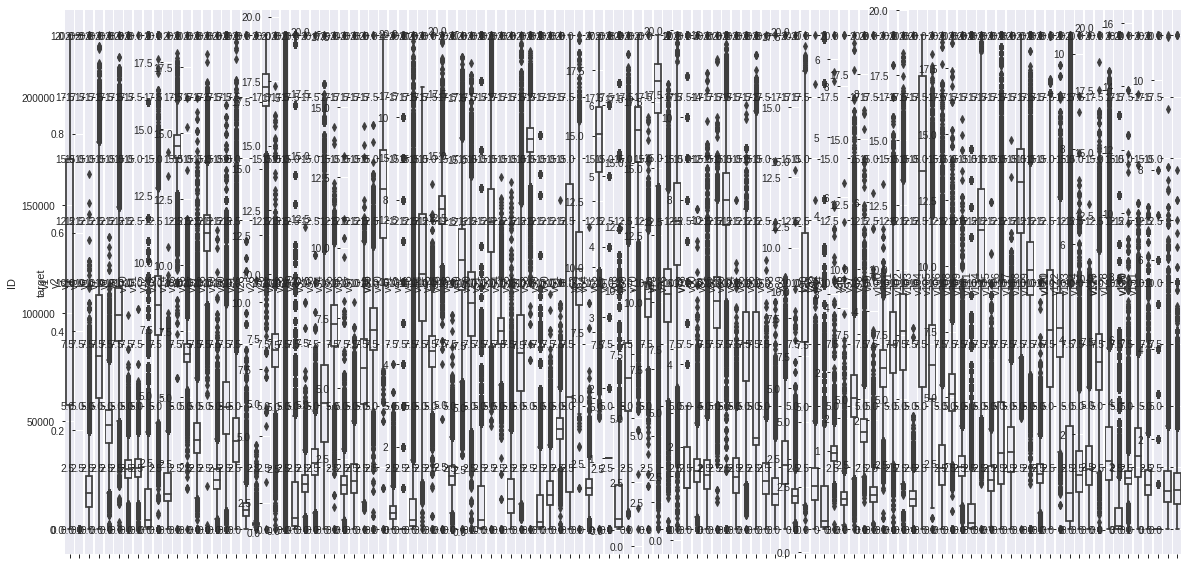


To check pairwise joint distribution of numeric data


KeyboardInterrupt: 

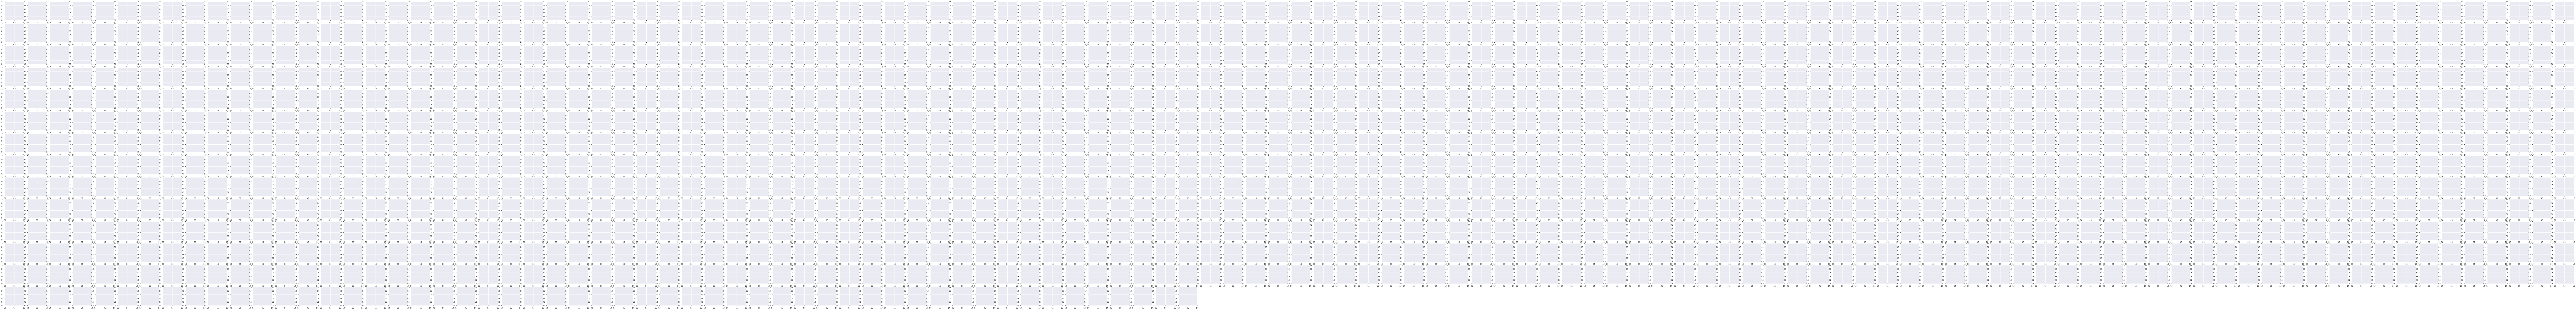

In [32]:
from eda import EDA
EDA(train)

In [ ]:
train = fn_features(train)
test  = fn_features(test)
train.shape, test.shape

# 2. DATA MISSING

In [1]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

In [2]:
# Verificando as colunas com dados missing do dataset de treino
missing = percent_missing(train)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:133]

NameError: name 'train' is not defined

In [ ]:
# Verificando as colunas com dados missing do dataset de treino
missing = percent_missing(test)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:133]

In [ ]:
# Setup do plot
sns.set_style("white")
f, ax = plt.subplots(figsize=(18, 16))
sns.set_color_codes(palette='deep')

# Identificando os valores missing
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# Visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [ ]:
# Funcao para tratar os dados missing de cada variavel
def fill_na(data):
    data.fillna(data.mean(),inplace=True)

# Criando as funções auxiliares de limpeza e conversao

In [ ]:
# Funcao para criar um plot de distribuicao para cada feature
def plot_distribution(dataset, cols=5, width=20, height=25, hspace=0.4, wspace=0.5):
    """
    Plot distributions for each column in a dataset.
    Seaborn countplots are used for categorical data and distplots for numerical data

    args:
    ----
    dataset {dataframe} - the data that will be plotted
    cols {int} - how many distributions to plot for each row
    width {int} - how wide each plot should be
    height {int} - how tall each plot should be
    hspace {float} - horizontal space between plots
    wspace {float} - vertical space between plots 
    """
    # plot styling
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    # calculate rows needed
    rows = math.ceil(float(dataset.shape[1]) / cols)
    # create a countplot for top 20 categorical values
    # and a distplot for all numerical values
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            # grab the top 10 for each countplot
            g = sns.countplot(y=column, 
                              data=dataset,
                              order=dataset[column].value_counts().index[:10])
            # make labels only 20 characters long and rotate x labels for nicer displays
            substrings = [s.get_text()[:20] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

# Resolvendo missing values e realizando limpeza das features

In [ ]:
# Primeiro, vou preencher os dados missing com a media (apenas para iniciar as analises)
#fill_na(train)

# Analisando Correlacoes

In [ ]:
# Correlação de Pearson
cor_mat = train.corr(method = 'pearson')

# Visualizando o grafico de heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor_mat,linewidths=.1,fmt= '.3f',ax=ax,square=True,cbar=True,annot=False)

# 3. Analisando todas as features do dataset

### Analisando a variavel target

In [ ]:
# Descricao: é igual a 1 para indenizações que podem ser aprovadas rapidamente.
train['target'].describe()

In [ ]:
# Analisando a variavel target
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(12, 6))

# Fit a normal distribution
mu, std = norm.fit(train["target"])

# Verificando a distribuicao de frequencia da variavel Yards
sns.distplot(train["target"], color="b", fit = stats.norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Target")
ax.set(title="Target distribution: mu = %.2f,  std = %.2f" % (mu, std))
sns.despine(trim=True, left=True)

# Adicionando Skewness e Kurtosis
ax.text(x=1.1, y=1, transform=ax.transAxes, s="Skewness: %f" % train["target"].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
ax.text(x=1.1, y=0.95, transform=ax.transAxes, s="Kurtosis: %f" % train["target"].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')

plt.show()

In [ ]:
# Existe um problema de desbalanceamento de classes, ou seja, volume maior de um dos tipos de classe. 
# Podemos ver abaixo que existe uma clara desproporção 
# Apenas 23% sao indenizacoes que nao podem ser aprovadas rapidamente

# Visualizando a distribuição das classes (variavel TARGET)
pd.value_counts(train['target']).plot.bar()
plt.title('TARGET histogram')
plt.xlabel('TARGET')
plt.ylabel('Frequency')

# Visualizando um df com quantidade e percentual da variavel TARGET
df = pd.DataFrame(train['target'].value_counts())
df['%'] = 100*df['target']/train.shape[0]
df

### Analisando as demais variáveis

In [ ]:
# Primeiro, vamos remover a coluna ID
train.drop(['ID'], axis=1, inplace=True)

### Analisando as variáveis com muitos dados missing

In [ ]:
# Analise Exploratoria das features categoricas
f, ax = plt.subplots(1,4, figsize=(18, 4))

sns.countplot(train['v3'], color='c', ax=ax[0])
ax[0].set_title('Distribuição da feature v3', fontsize=14)

sns.countplot(train['v24'], color='g', ax=ax[1])
ax[1].set_title('Distribuição da feature v24', fontsize=14)

sns.countplot(train['v31'], color='b', ax=ax[2])
ax[2].set_title('Distribuição da feature v31', fontsize=14)

sns.countplot(train['v47'], color='b', ax=ax[3])
ax[3].set_title('Distribuição da feature v47', fontsize=14)

f.show()

In [ ]:
# Analise Exploratoria das features categoricas
f, ax = plt.subplots(1,4, figsize=(18, 4))

sns.countplot(train['v52'], color='c', ax=ax[0])
ax[0].set_title('Distribuição da feature v52', fontsize=14)

sns.countplot(train['v66'], color='g', ax=ax[1])
ax[1].set_title('Distribuição da feature v66', fontsize=14)

sns.countplot(train['v71'], color='b', ax=ax[2])
ax[2].set_title('Distribuição da feature v71', fontsize=14)

sns.countplot(train['v74'], color='b', ax=ax[3])
ax[3].set_title('Distribuição da feature v74', fontsize=14)

f.show()

In [ ]:
# Analise Exploratoria das features categoricas
f, ax = plt.subplots(1,4, figsize=(18, 4))

sns.countplot(train['v75'], color='c', ax=ax[0])
ax[0].set_title('Distribuição da feature v75', fontsize=14)

sns.countplot(train['v79'], color='g', ax=ax[1])
ax[1].set_title('Distribuição da feature v79', fontsize=14)

sns.countplot(train['v91'], color='b', ax=ax[2])
ax[2].set_title('Distribuição da feature v91', fontsize=14)

sns.countplot(train['v107'], color='b', ax=ax[3])
ax[3].set_title('Distribuição da feature v107', fontsize=14)

f.show()

In [ ]:
# Analise Exploratoria das features categoricas
f, ax = plt.subplots(1,4, figsize=(18, 4))

sns.countplot(train['v110'], color='c', ax=ax[0])
ax[0].set_title('Distribuição da feature v110', fontsize=14)

sns.countplot(train['v112'], color='g', ax=ax[1])
ax[1].set_title('Distribuição da feature v112', fontsize=14)

sns.countplot(train['v125'], color='b', ax=ax[2])
ax[2].set_title('Distribuição da feature v125', fontsize=14)

sns.countplot(train['v30'], color='b', ax=ax[3])
ax[3].set_title('Distribuição da feature v30', fontsize=14)

f.show()

In [ ]:
f, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x='v30', data=train, color='c')
ax.set_title('Distribuição da feature v30', fontsize=14)

In [ ]:
f, ax = plt.subplots(figsize=(18, 5))
sns.countplot(x='v113', data=train, color='c')
ax.set_title('Distribuição da feature v113', fontsize=14)

In [ ]:
train['v102'].value_counts()

In [ ]:
train['v102'].fillna(train['v102'].median(),inplace=True)

In [ ]:
# Analisando a variavel target
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(12, 6))

# Fit a normal distribution
mu, std = norm.fit(train["v102"])

# Verificando a distribuicao de frequencia da variavel Yards
sns.distplot(train["v102"], color="b", fit = stats.norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="v102")
ax.set(title="v102 distribution: mu = %.2f,  std = %.2f" % (mu, std))
sns.despine(trim=True, left=True)

# Adicionando Skewness e Kurtosis
ax.text(x=1.1, y=1, transform=ax.transAxes, s="Skewness: %f" % train["v102"].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
ax.text(x=1.1, y=0.95, transform=ax.transAxes, s="Kurtosis: %f" % train["v102"].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')

plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(18, 25))
sns.countplot(y='v56', data=train, color='c')
ax.set_title('Distribuição da feature v56', fontsize=14)

In [ ]:
f, ax = plt.subplots(figsize=(18, 25))
sns.countplot(y='v125', data=train, color='c')
ax.set_title('Distribuição da feature v125', fontsize=14)

## Construindo um rapido BASELINE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Separando features preditoras e target
X = train.drop(['ID', 'target'], axis=1)
y = train['target']

# Preenche os dados missing
X = X.fillna(-999)

# Label encoder
for c in train.columns[train.dtypes == 'object']:
    X[c] = X[c].factorize()[0]

rf = RandomForestClassifier()
rf.fit(X,y)

In [ ]:
f, ax = plt.subplots(figsize=(24, 10))

plt.plot(rf.feature_importances_,color='green', linestyle='dashed',linewidth=1, markersize=12)

plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=True,
    labelsize=10)

In [ ]:
# Concatenar dataset de treino e teste para analises
result = train.append(test)

In [ ]:
result.sort_values('ID')

In [ ]:
print('Media: ', train.v100.mean())
print('Std: ', train.v100.std())

print('Media: ', result.v100.mean())
print('Std: ', result.v100.std())

In [ ]:
train.v100.value_counts()

In [ ]:
v_unique = train.v100.unique()
v_unique_sorted = np.sort(v_unique)
np.diff(v_unique_sorted)

In [ ]:
train.info()

## Construindo um rapido BASELINE 2

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# Separando features preditoras e target
X = train.drop(['ID', 'target'], axis=1)
y = train['target']

# Preenche os dados missing
X = X.fillna(-999)

# Label encoder
for c in train.columns[train.dtypes == 'object']:
    X[c] = X[c].factorize()[0]

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X, y)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)